Linear vs Polynomial Regression

Introduction: When and Why to Use Polynomial Regression

Polynomial regression is used when the relationship between the independent variable (X) and the dependent variable (y) is non-linear. If a linear model underfits the data, polynomial regression may improve model accuracy by introducing higher-order terms.

Polynomial Regression Formula

The general formula for a polynomial regression of degree ( n ) is:


Where:

( b_0, b_1, ..., b_n ) are the coefficients
( x ) is the independent variable
Example
Suppose we have a dataset:

X = [1, 2, 3]
y = [3, 6, 13]

We want to fit a polynomial model of degree 2:


Constructing the design matrix (X_poly):

X_poly = [[1, 1,  1],   # x = 1 → [1, x, x^2]
          [1, 2,  4],   # x = 2
          [1, 3,  9]]   # x = 3

And the target vector:

y = [3, 6, 13]

Using the normal equation in least squares:


This will yield the values of ( b_0, b_1, b_2 ) that minimize the squared error.

Visualizing Dummy Data

Dummy Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x=np.array([1,2,3,4,5]).reshape((-1,1))
y=np.array([3,6,13,28,55])

Linear Regression

In [ ]:
linear_model=LinearRegression()
linear_model.fit(x,y)
y_linear_pred=linear_model.predict(x)

Polynomial Regression(degree 2)

In [ ]:
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
poly_model=LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly=poly_model.predict(x_poly)
print(y_pred_poly)

[ 3.8  4.4 13.  29.6 54.2]


Plot

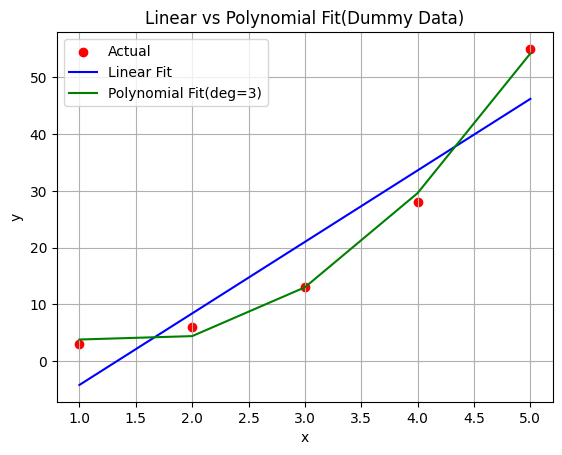

In [ ]:
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_linear_pred,label='Linear Fit',color='blue')
plt.plot(x,y_pred_poly,label='Polynomial Fit(deg=3)',color='green')
plt.title("Linear vs Polynomial Fit(Dummy Data)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

Real Dataset:Salary Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Load dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.iloc[6703]

,6703
Years of Experience,1.0
Salary,35000.0


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [ ]:
X=df[["Years of Experience"]]
y=df["Salary"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Linear Regression

Train linear regression

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

Metrics

In [ ]:
mse_lin=mean_squared_error(y_test,y_pred_lin)
rmse_lin=np.sqrt(mse_lin)
r2_lin=r2_score(y_test,y_pred_lin)

print("Linear Regression:")
print("MSE:",mse_lin)
print("RMSE",rmse_lin)
print("R2 Score:",r2_lin)

Linear Regression:
MSE: 946833177.7094355
RMSE 30770.654489455297
R2 Score: 0.6669549610495003


Polynomial Regression(Degrees 2 and 4)

Degree 2

In [ ]:
poly2=PolynomialFeatures(degree=2)
X_train_poly2=poly2.fit_transform(X_train)
X_test_poly2=poly2.transform(X_test)

poly2_model= LinearRegression()
poly2_model.fit(X_train_poly2,y_train)
y_pred_poly2=poly2_model.predict(X_test_poly2)

Degree 2

In [ ]:
poly2=PolynomialFeatures(degree=2)
X_train_poly2=poly2.fit_transform(X_train)
X_test_poly2=poly2.transform(X_test)

poly2_model=LinearRegression()
poly2_model.fit(X_train_poly2,y_train)
y_pred_poly2=poly2_model.predict(X_test_poly2)

Metrics

In [ ]:
mse_poly2=mean_squared_error(y_test,y_pred_poly2)
rmse_poly2=np.sqrt(mse_poly2)
r2_poly2=r2_score(y_test,y_pred_poly2)


Degree 4

In [32]:
poly4=PolynomialFeatures(degree=4)
X_train_poly4=poly4.fit_transform(X_train)
X_test_poly4=poly4.transform(X_test)

poly4_model=LinearRegression()
poly4_model.fit(X_train_poly4,y_train)
y_pred_poly4=poly4_model.predict(X_test_poly4)

Metrics

In [34]:
mse_poly4=mean_squared_error(y_test,y_pred_poly4)
rmse_poly4=np.sqrt(mse_poly4)
r2_poly4=r2_score(y_test,y_pred_poly4)
print("\nPolynomial Regression (Degree 2):")
print("MSE:", mse_poly2)
print("RMSE:", rmse_poly2)
print("R2 Score:", r2_poly2)

print("\nPolynomial Regression (Degree 4):")
print("MSE:", mse_poly4)
print("RMSE:", rmse_poly4)
print("R2 Score:", r2_poly4)



Polynomial Regression (Degree 2):
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963

Polynomial Regression (Degree 4):
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


Visualization Of All Models

Generate smooth line for predictions

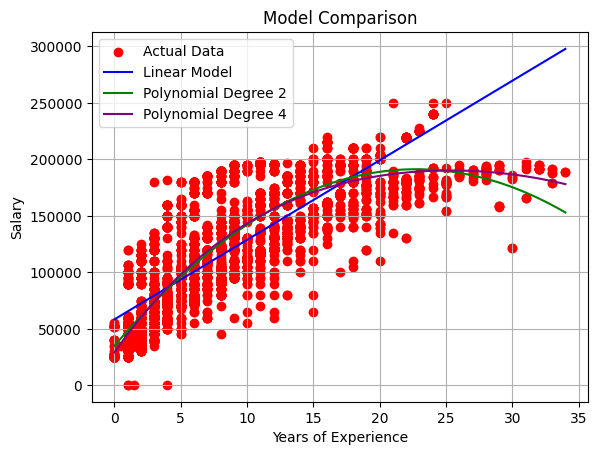

In [35]:

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Create DataFrame with column name
X_range_df = pd.DataFrame(X_range, columns=["Years of Experience"])

# Transform using polynomial features
X_range_poly2 = poly2.transform(X_range_df)
X_range_poly4 = poly4.transform(X_range_df)

# Predict using models
y_range_lin = lin_model.predict(X_range_df)
y_range_poly2 = poly2_model.predict(X_range_poly2)
y_range_poly4 = poly4_model.predict(X_range_poly4)

# Plot
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_range, y_range_lin, label='Linear Model', color='blue')
plt.plot(X_range, y_range_poly2, label='Polynomial Degree 2', color='green')
plt.plot(X_range, y_range_poly4, label='Polynomial Degree 4', color='purple')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Model Comparison")
plt.legend()
plt.grid(True)
plt.show()